In [71]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import re

In [72]:
datadir_local = "data/mooring/"
datadir       = os.getcwd()+"/../"+datadir_local

In [73]:
d = "GAK1_2016_3531m.dat"
# re.findall("[1-3][0-9]{3}", d)
# re.findall("[0-9]+m", d)
d.__contains__("GAK")

True

In [74]:
# walk through directory to get file names
f = {}
for (dirpath, dirnames, filenames) in os.walk(datadir):
    if any([fn.startswith("GAK1_") or fn.startswith("UAF_") for fn in filenames]):
        # thisdir       = dirpath.split("/")[-1]
        fpaths        = [os.path.join(dirpath,fn) for fn in filenames]
        yr            = re.findall("[1-3][0-9]{3}", filenames[0])[0]
        dpth          = [int(re.findall("[0-9]+m", fn)[0][0:-1]) for fn in filenames]
        fpaths_sorted = [x for _,x in sorted(zip(dpth, fpaths))]   # sort the paths according to depth
        f[yr]         = fpaths_sorted
df_fpaths = pd.DataFrame(f)
# df_fpaths

In [41]:
# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_24m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_23m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_25m.dat"]

# fnames   = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_56m.dat",
#             "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_56m.dat",
#             "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_53m.dat"]

# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_157m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_144m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_145m.dat"]

# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_199m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_198m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_198m.dat"]


# df_all = pd.DataFrame(columns=["Date", "Temperature"], index=None)
# for fname in fnames:
#     # figure out how many rows need to be skipped, differs between files
#     num = 0
#     with open(fname) as f:
#         lines = f.readlines()
#         datalines = [i for i, l in enumerate(lines) if not l.startswith("%" )]
#         if len(datalines) > 0: num = datalines[0]
#     # read in
#     dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
#     # change type of date and time to string
#     dfgak_[dfgak_.columns[0:6]] = dfgak_.iloc[:, 0:6].astype('string')
#     # string to datetime
#     Datetr = [dfgak_.iloc[i,0]+"-"+dfgak_.iloc[i,1]+"-"+dfgak_.iloc[i,2] for i in range(dfgak_.shape[0])]
#     # dfgak_["Date"] = pd.to_datetime(datestr)
#     dfgak_["Date"] = [dt.datetime.strptime(d, format).date() for d in datestr]
#     # only take relevant columns and add them to df_all
#     dfgak_out = pd.DataFrame({"Date":dfgak_.Date, "Temperature":dfgak_[8]})      # , "Depth [m]":dfgak_[7]
#     df_all = pd.concat([df_all, dfgak_out])  # normally not the best practice as memory/time inefficient
# df_all

In [92]:
fname = "/home/annegret/Projects/Hubbard2024/data/mooring/gak1_2015-2016_ctd_L2_v2/UAF_GAK1_2015_ctd017m_L2_v2.csv"
dfgak_ = pd.read_csv(fname)
dd = dfgak_["Date_Time_[UTC]"][0]
dt.datetime.strptime()
# [dt.datetime.strptime(d, format).date() for d in dfgak_["Date_Time_[UTC]"]]

'2015-03-10T23:15:01'

In [93]:
depths   = ["25m", "50m", "100m", "150m", "200m", "250m"]
colnames = ["Date"]
[colnames.append("Temperature [deg C] @ "+d) for d in depths]

def prepare_dfgak(fname):
    # read in
    if fname.endswith(".csv"):
        dfgak_ = pd.read_csv(fname)
        format = "%Y-%m-%dT%H:%M:%S"
        dates = [dt.datetime.strptime(d, format).date() for d in dfgak_["Date_Time_[UTC]"]]
        return pd.DataFrame({"Date":dates, "Temperature":dfgak_["Temperature_[C]"]})
    else:
        # figure out how many rows need to be skipped, differs between files
        num = 0
        with open(fname) as f:
            lines = f.readlines()
            datalines = [i for i, l in enumerate(lines) if not l.startswith("%" )]
            if len(datalines) > 0: num = datalines[0]
        dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
        # change type of date and time to string
        dfgak_[dfgak_.columns[0:6]] = dfgak_.iloc[:, 0:6].astype('string')
        # string to datetime
        datestr = [dfgak_.iloc[i,0]+"-"+dfgak_.iloc[i,1]+"-"+dfgak_.iloc[i,2] for i in range(dfgak_.shape[0])]
        format = "%Y-%m-%d"
        dfgak_["Date"] = [dt.datetime.strptime(d, format).date() for d in datestr]
        # only take relevant columns
        return pd.DataFrame({"Date":dfgak_.Date, "Temperature":dfgak_[8]})      # , "Depth [m]":dfgak_[7]

# loop over all depths and years
df_all = pd.DataFrame(index=None)
for r in df_fpaths.iterrows():   # every row corresponds to certain depth
    ir, row = r
    pdtemp = pd.DataFrame(columns=["Date", "Temperature"], index=None)
    for fname in row: # loop over years for this depth
        dfgak_out = prepare_dfgak(fname)
        pdtemp = pd.concat([pdtemp, dfgak_out])
    # sort by date
    pdtemp.sort_values(by=["Date"], inplace=True, ignore_index=True)
    if df_all.empty:
        df_all["Date"] = pdtemp["Date"]
    df_all[colnames[ir+1]] = pdtemp["Temperature"]
df_all

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_983545/387586411.py:19: SyntaxWarning: invalid escape sequence '\s'
  dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
/tmp/ipykernel_983545/387586411.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pdtemp = pd.concat([pdtemp, dfgak_out])
/tmp/ipykernel_983545/387586411.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pdtemp = p

,Date,Temperature [deg C] @ 25m,Temperature [deg C] @ 50m,Temperature [deg C] @ 100m,Temperature [deg C] @ 150m,Temperature [deg C] @ 200m,Temperature [deg C] @ 250m
0,2015-03-10,5.051,5.829,6.442,6.869,6.761,6.700
1,2015-03-10,5.047,5.747,6.266,6.873,6.763,6.698
2,2015-03-10,5.055,5.775,6.525,6.869,6.765,6.701
3,2015-03-11,5.152,5.153,6.560,6.838,6.819,6.727
4,2015-03-11,5.136,5.157,6.572,6.836,6.833,6.730
...,...,...,...,...,...,...,...
177904,2020-05-10,5.803,4.959,5.303,NaN,5.973,5.901
177905,2020-05-10,5.816,4.955,5.309,NaN,5.978,NaN
177906,2020-05-10,5.810,4.920,NaN,NaN,NaN,NaN
177907,2020-05-10,5.806,4.831,NaN,NaN,NaN,NaN


In [102]:
# use lowess filter to smooth time series, easier on day index rather than datetime format
t0 = dt.datetime.strptime("2015-01-01", "%Y-%m-%d").date()
t_index_data   = np.zeros(len(df_all.Date), dtype=int)
for (i, da) in enumerate(df_all.Date):
    deltat = da - t0
    t_index_data[i] = deltat.days
lowess = sm.nonparametric.lowess

df_smooth = pd.DataFrame(columns=df_all.columns)
df_smooth["Date"] = df_all["Date"]
for col in df_all[1:]:
    if col == "Date":
        continue
    z = lowess(df_all[col], t_index_data, frac=1/30, xvals=t_index_data)
    df_smooth[col] = z

df_smooth.to_csv(os.path.join(datadir,"GAK_smooth.csv"), index=False)

177909


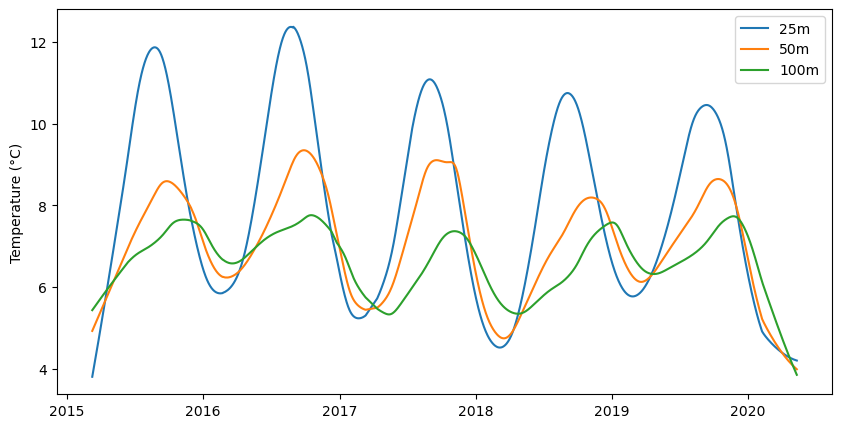

In [103]:
plt.figure(figsize=(10,5))
for (i,col) in enumerate(df_smooth):
    if (col == "Date") or (i > 3):
        continue
    depth = col.split(" ")[-1]
    plt.plot(df_smooth.Date, df_smooth[col], label=depth)

plt.ylabel("Temperature (°C)")
plt.legend()